In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import xgboost as xgb
import plotly.graph_objects as go
from sklearn.compose import ColumnTransformer
from tabulate import tabulate
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import iplot
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prob2-cummins/Social Media Usage - Test.xlsm
/kaggle/input/prob2-cummins/Social Media Usage - Test_updated.xlsm
/kaggle/input/prob2-cummins/Sleep Dataset.xlsm
/kaggle/input/prob2-cummins/Social Media Usage - Train.xlsm
/kaggle/input/prob2-cummins/Social Media Usage - Val.xlsm
/kaggle/input/prob2-cummins/Social Media Usage - Val_updated.xlsm
/kaggle/input/prob2-cummins/updated_social_media_usage_train.xlsm


In [81]:
df = pd.read_excel("/kaggle/input/prob2-cummins/Sleep Dataset.xlsm")
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Sleep Disorder')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [82]:
# df.skew()

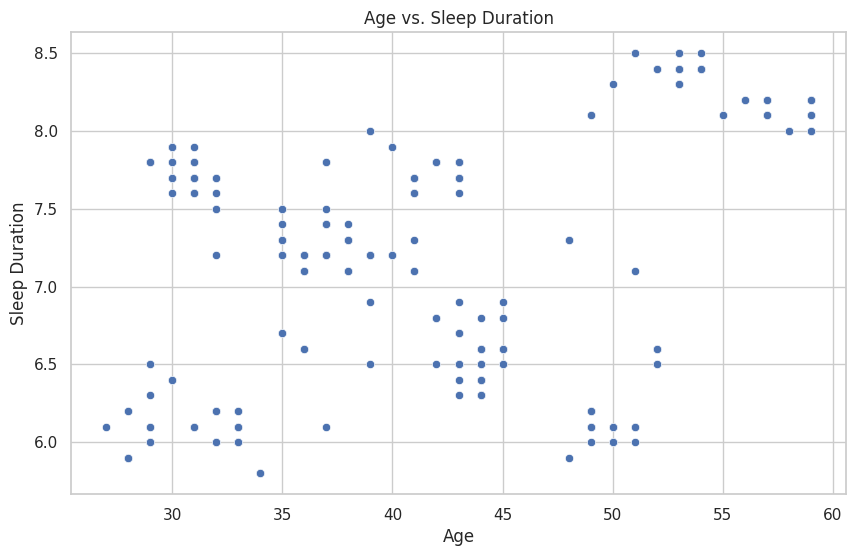

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



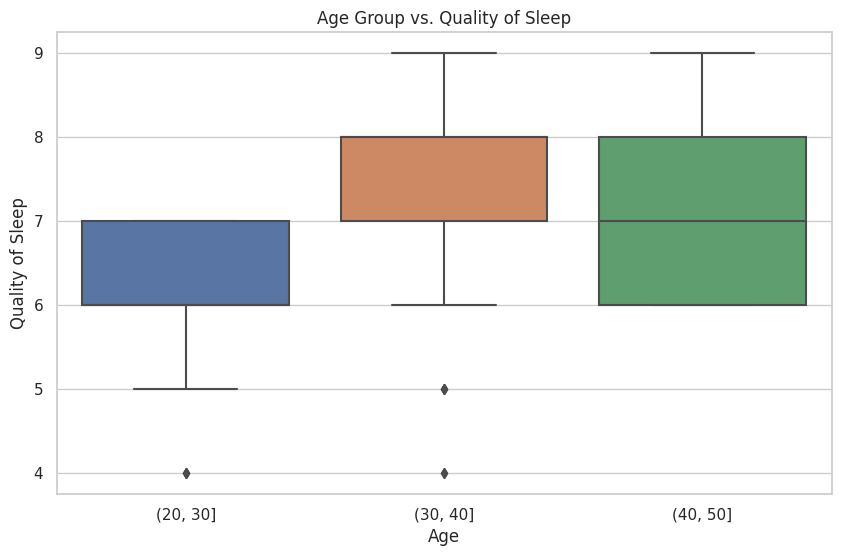

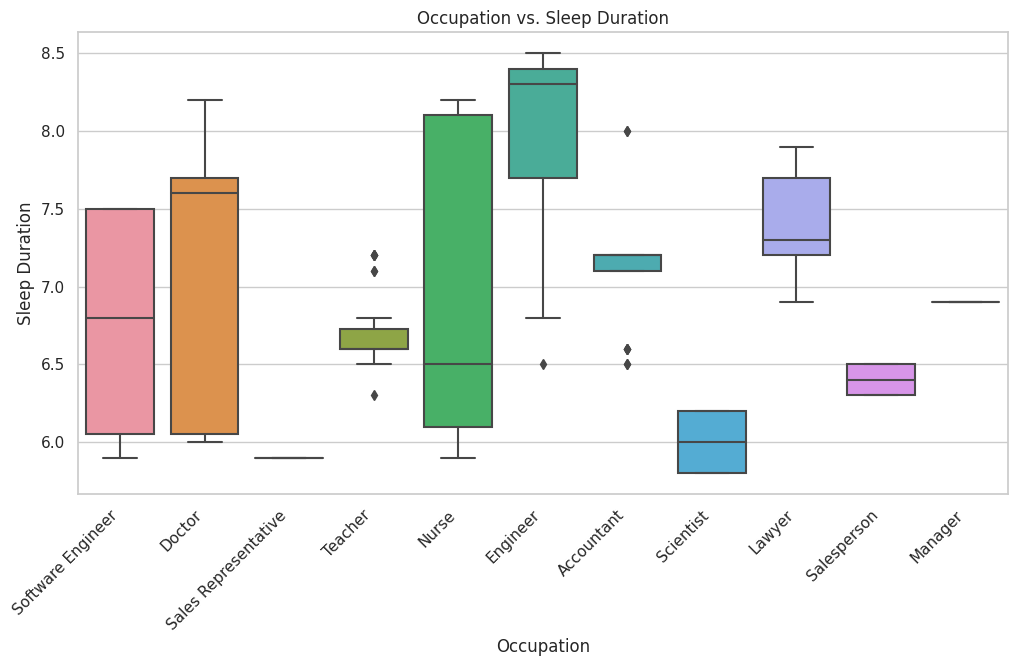

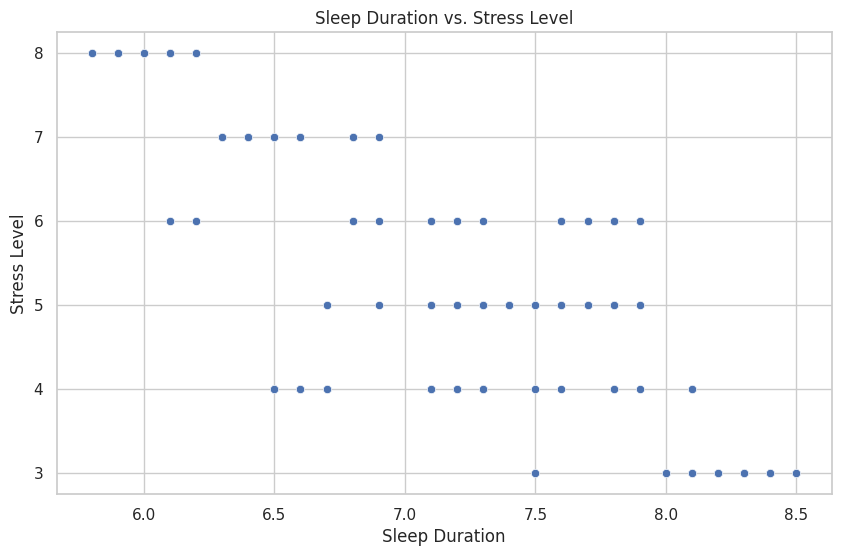

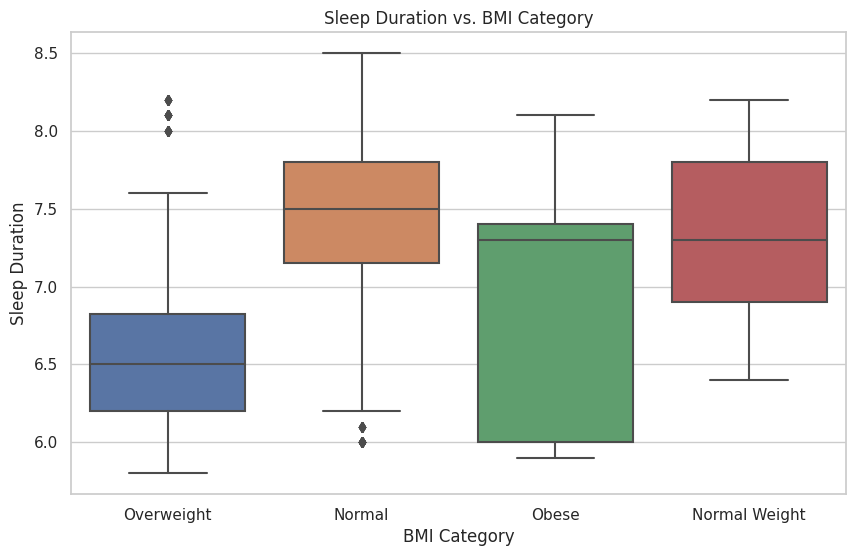

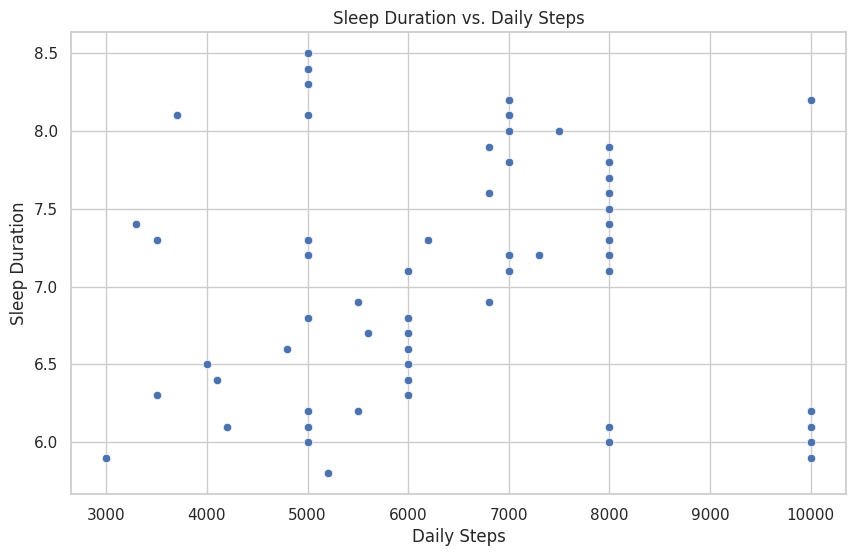

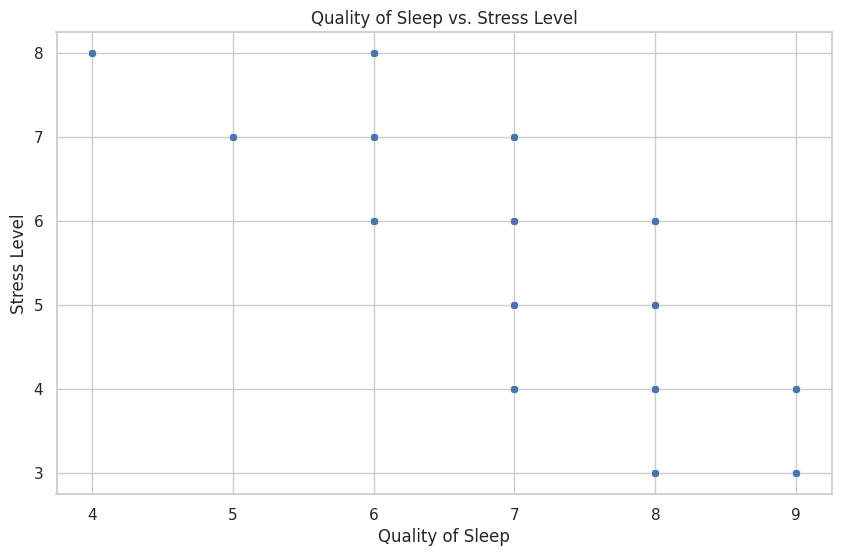

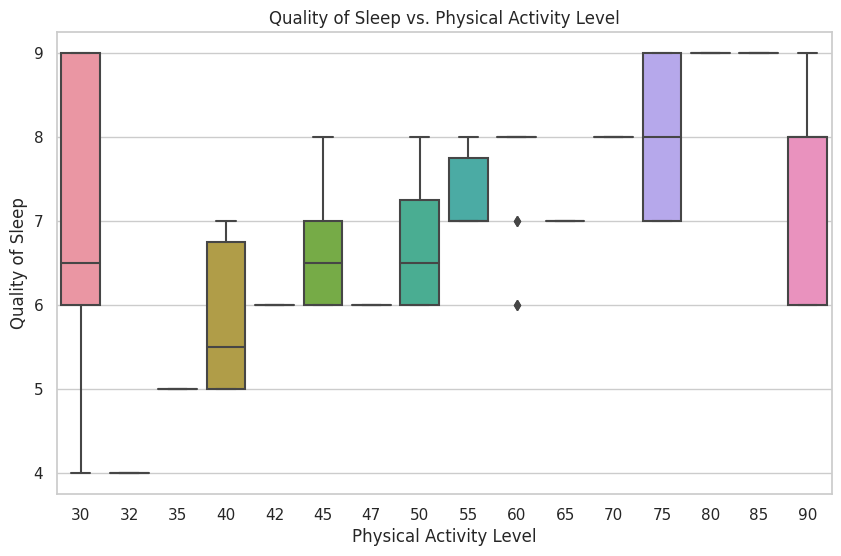

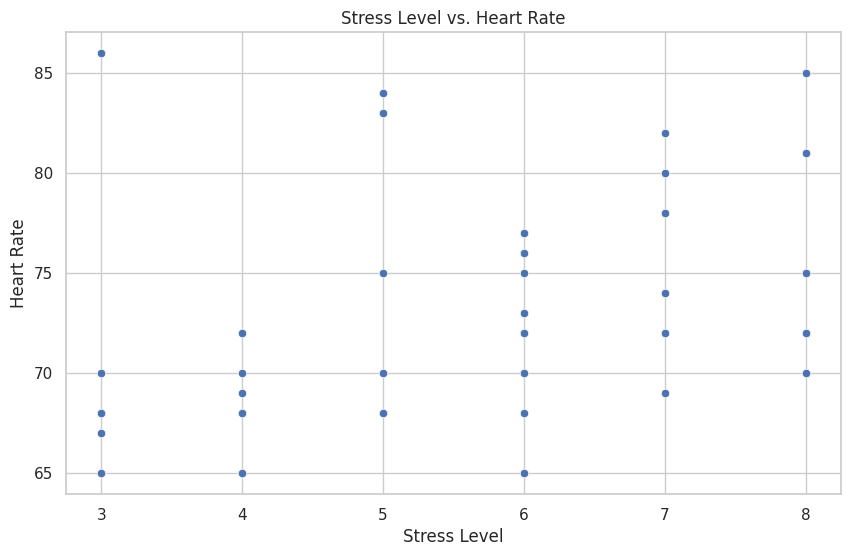

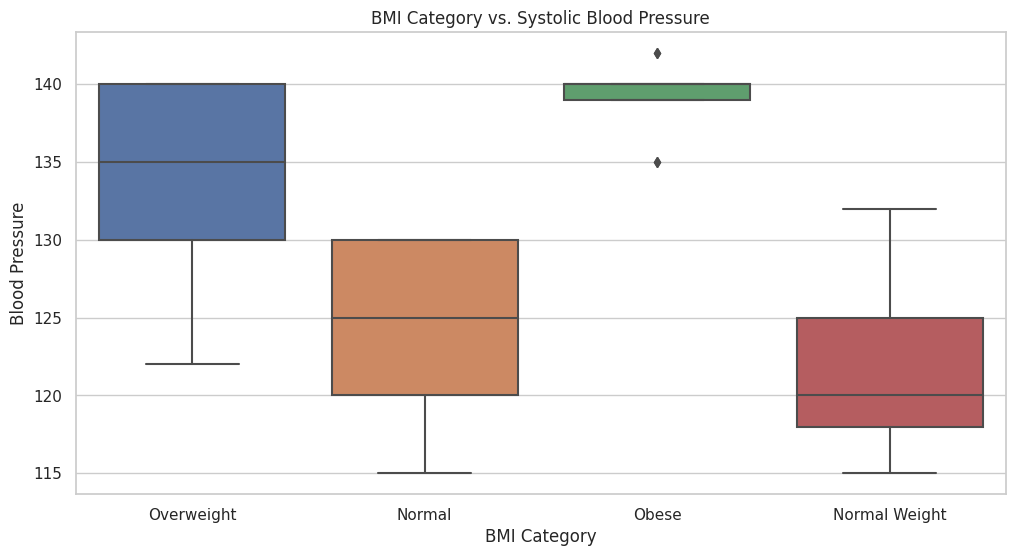

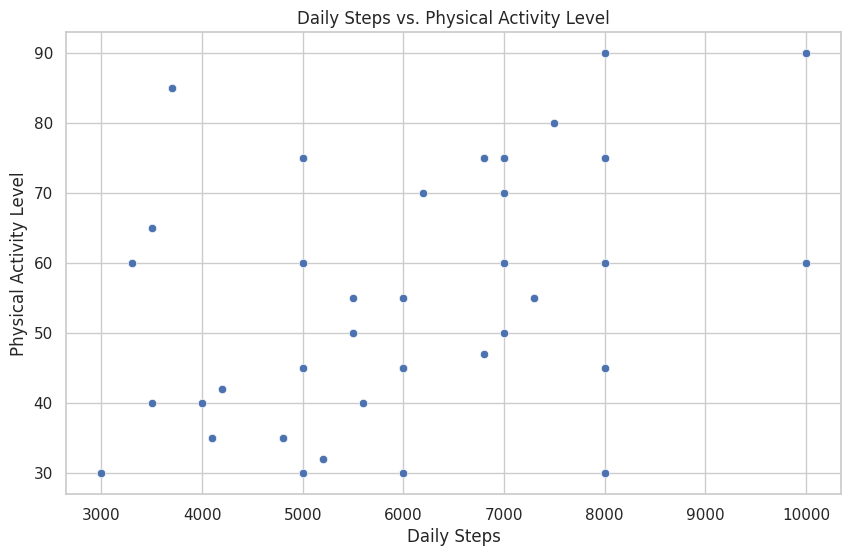

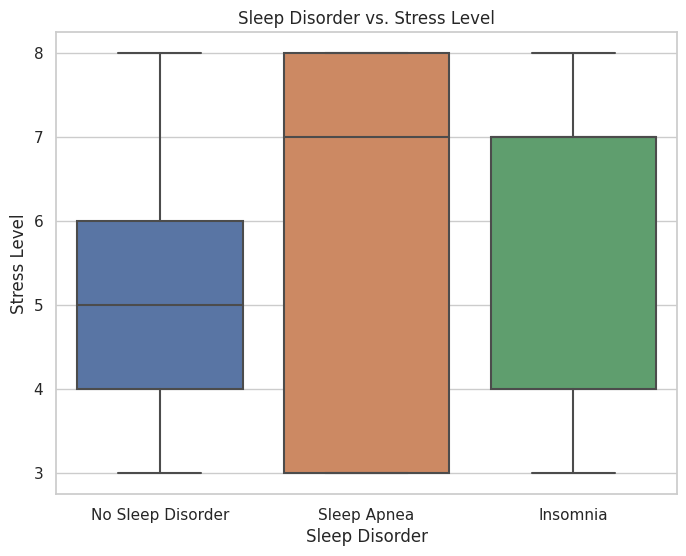

In [85]:
# 1. Age vs. Sleep Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs. Sleep Duration')
plt.show()

# 2. Age vs. Quality of Sleep
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['Age'], bins=[20, 30, 40, 50]), y='Quality of Sleep', data=df)
plt.title('Age Group vs. Quality of Sleep')
plt.show()

# 3. Occupation vs. Sleep Duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Occupation vs. Sleep Duration')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Sleep Duration vs. Stress Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Stress Level', data=df)
plt.title('Sleep Duration vs. Stress Level')
plt.show()

# 5. Sleep Duration vs. BMI Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('Sleep Duration vs. BMI Category')
plt.show()

# 6. Sleep Duration vs. Daily Steps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Steps', y='Sleep Duration', data=df)
plt.title('Sleep Duration vs. Daily Steps')
plt.show()

# 7. Quality of Sleep vs. Stress Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quality of Sleep', y='Stress Level', data=df)
plt.title('Quality of Sleep vs. Stress Level')
plt.show()

# 8. Quality of Sleep vs. Physical Activity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Physical Activity Level', y='Quality of Sleep', data=df)
plt.title('Quality of Sleep vs. Physical Activity Level')
plt.show()

# 9. Stress Level vs. Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level', y='Heart Rate', data=df)
plt.title('Stress Level vs. Heart Rate')
plt.show()

# 10. BMI Category vs. Blood Pressure
plt.figure(figsize=(12, 6))
sns.boxplot(x='BMI Category', y=df['Blood Pressure'].str.split('/').str[0].astype(int), data=df)
plt.title('BMI Category vs. Systolic Blood Pressure')
plt.show()

# 11. Daily Steps vs. Physical Activity Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Steps', y='Physical Activity Level', data=df)
plt.title('Daily Steps vs. Physical Activity Level')
plt.show()

# 12. Sleep Disorder vs. Stress Level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df)
plt.title('Sleep Disorder vs. Stress Level')
plt.show()

In [86]:
# Load the dataset
# 1. Sales Representative vs. Salesperson
occupation_counts = df['Occupation'].value_counts()
fig_occupation_counts = px.bar(x=occupation_counts.index, y=occupation_counts.values,
                              title='Occupation Counts')
iplot(fig_occupation_counts)
#  "Sales Representative" and "Salesperson" redundncy

In [87]:
# 2. Doctor Data Analysis
doctor_data = df[df['Occupation'] == 'Doctor']

# A very common heart rate of "70" bpm
# Many doctors have "8000" daily steps-artificial value or a target value
# 2a. Doctor Blood Pressure Frequencies
doctor_bp_counts = doctor_data['Blood Pressure'].value_counts()
fig_doctor_bp = px.bar(x=doctor_bp_counts.index, y=doctor_bp_counts.values,
                        title='Doctor Blood Pressure Frequencies')
iplot(fig_doctor_bp)

# 2b. Doctor Heart Rate Frequencies
doctor_hr_counts = doctor_data['Heart Rate'].value_counts()
fig_doctor_hr = px.bar(x=doctor_hr_counts.index, y=doctor_hr_counts.values,
                        title='Doctor Heart Rate Frequencies')
iplot(fig_doctor_hr)

# 2c. Doctor Daily Steps Frequencies
doctor_steps_counts = doctor_data['Daily Steps'].value_counts()
fig_doctor_steps = px.bar(x=doctor_steps_counts.index, y=doctor_steps_counts.values,
                           title='Doctor Daily Steps Frequencies')
iplot(fig_doctor_steps)

# 2d. Doctor Physical Activity Level Frequencies
doctor_pa_counts = doctor_data['Physical Activity Level'].value_counts()
fig_doctor_pa = px.bar(x=doctor_pa_counts.index, y=doctor_pa_counts.values,
                        title='Doctor Physical Activity Level Frequencies')
iplot(fig_doctor_pa)

In [88]:
# 3. Salesperson Data Analysis  nerby frequency  
salesperson_data = df[df['Occupation'] == 'Salesperson']
salesperson_pa_counts = salesperson_data['Physical Activity Level'].value_counts()
fig_salesperson_pa = px.bar(x=salesperson_pa_counts.index, y=salesperson_pa_counts.values,
                             title='Salesperson Physical Activity Level Frequencies')
iplot(fig_salesperson_pa)

In [89]:
# 4. Teacher Data Analysis
# 135/90 are suspiciously common among accountants and teacher
teacher_data = df[df['Occupation'] == 'Teacher']
teacher_bp_counts = teacher_data['Blood Pressure'].value_counts()
fig_teacher_bp = px.bar(x=teacher_bp_counts.index, y=teacher_bp_counts.values,
                         title='Teacher Blood Pressure Frequencies')
iplot(fig_teacher_bp)

In [90]:
# 5. Accountant Data Analysis
# 115/75 are suspiciously common among accountants and teachers ccheck up

accountant_data = df[df['Occupation'] == 'Accountant']
accountant_bp_counts = accountant_data['Blood Pressure'].value_counts()
fig_accountant_bp = px.bar(x=accountant_bp_counts.index, y=accountant_bp_counts.values,
                           title='Accountant Blood Pressure Frequencies')
iplot(fig_accountant_bp)

In [91]:
# 6. Co-occurrence of Insomnia and Sleep Apnea
sleep_disorder_counts = df['Sleep Disorder'].value_counts()
fig_sleep_disorder = px.bar(x=sleep_disorder_counts.index, y=sleep_disorder_counts.values,
                            title='Sleep Disorder Counts')
iplot(fig_sleep_disorder)

In [92]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_regression_models(df, target_column):
    """
    Trains and evaluates regression models for continuous targets.
    """
    # 1️⃣ Define Regression Models
    models = {
        "ExtraTrees": ExtraTreesRegressor(n_estimators=100, random_state=42),
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
        "DecisionTree": DecisionTreeRegressor(random_state=42),
        "LibLinear_SVR": LinearSVR(random_state=42, max_iter=9000)
    }

    # 2️⃣ Prepare Data
    df = df.dropna()
    X = pd.get_dummies(df.drop(columns=[target_column]))  # Encode categorical features
    y = df[target_column]

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3️⃣ Train and Evaluate Models
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Regression Metrics
        mse = round(mean_squared_error(y_test, y_pred), 4)
        r2 = round(r2_score(y_test, y_pred), 4)

        results.append([name, mse, r2])

    # 4️⃣ Create DataFrame
    df_results = pd.DataFrame(results, columns=["Model Name", "MSE", "R2 Score"])
    return df_results

In [93]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

def calculate_feature_importance(df, target_column):
    # Check if the target column exists in the DataFrame
    if target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in DataFrame.")
    
    # Separate the target variable and features
    y = df[target_column]
    X = df.drop(columns=[target_column])
    
    # One-hot encode categorical features
    X_encoded = pd.get_dummies(X)
    
    # Determine if the problem is regression or classification
    if np.issubdtype(y.dtype, np.number):
        # Use regression if target is numeric and has more than 10 unique values
        if y.nunique() > 10:
            model = RandomForestRegressor(n_estimators=100, random_state=42)
        else:
            model = RandomForestClassifier(n_estimators=100, random_state=42)
    else:
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X_encoded, y)
    
    # Extract feature importances
    importances = model.feature_importances_
    dummied_features = X_encoded.columns.tolist()
    original_features = X.columns.tolist()
    
    # Aggregate importances for original features
    feature_importance_dict = {}
    for feature in original_features:
        # Find all dummy columns originating from the original feature
        dummy_columns = [col for col in dummied_features if col.startswith(f"{feature}_")]
        if dummy_columns:
            # Sum the importances of all dummy columns
            total_importance = sum(importances[dummied_features.index(col)] for col in dummy_columns)
        else:
            # Check if the original feature is present (for numerical features)
            if feature in dummied_features:
                total_importance = importances[dummied_features.index(feature)]
            else:
                total_importance = 0.0
        feature_importance_dict[feature] = total_importance
    
    # Normalize the importances to sum to 1
    total = sum(feature_importance_dict.values())
    if total == 0:
        return pd.DataFrame({'Feature': [], 'Importance': []})
    for feature in feature_importance_dict:
        feature_importance_dict[feature] /= total
    
    # Create and sort the DataFrame
    importance_df = pd.DataFrame(
        list(feature_importance_dict.items()),
        columns=['Feature', 'Importance']
    ).sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    return importance_df

In [154]:
df = pd.read_excel("/kaggle/input/prob2-cummins/Sleep Dataset.xlsm")

category_mapping = {
    'Overweight': 'Overweight',
    'Obese': 'Obese',
    'Normal': 'Normal',
    'Normal Weight': 'Normal'  # Merge "Normal" and "Normal Weight"
}

    # Apply mapping to target column
df['BMI Category'] = df['BMI Category'].map(category_mapping)
# print(df['BMI Category'].unique())
print(df['Age'].describe())
df

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [106]:
df['Fitness_Score'] = (
    df['Physical Activity Level'] +
    (df['Daily Steps'] / 1000) +
    (110 - df['Heart Rate'])
)
importance_df = calculate_feature_importance(df, target_column='Fitness_Score')

# Display the result
print(importance_df)

                    Feature  Importance
0   Physical Activity Level    0.965391
1                Heart Rate    0.008555
2            Blood Pressure    0.006050
3            Sleep Duration    0.005874
4               Daily Steps    0.003541
5              BMI Category    0.003468
6              Stress Level    0.002717
7          Quality of Sleep    0.002423
8                Occupation    0.000652
9                       Age    0.000533
10                Person ID    0.000446
11                   Gender    0.000317
12           Sleep Disorder    0.000032


In [96]:
results_df = evaluate_regression_models(df.copy(), "Fitness_Score")
print(tabulate(results_df, headers="keys", tablefmt="fancy_grid", showindex=False))

╒══════════════════╤═════════╤════════════╕
│ Model Name       │     MSE │   R2 Score │
╞══════════════════╪═════════╪════════════╡
│ ExtraTrees       │  0.9974 │     0.9973 │
├──────────────────┼─────────┼────────────┤
│ RandomForest     │  5.1192 │     0.9863 │
├──────────────────┼─────────┼────────────┤
│ GradientBoosting │  0.6721 │     0.9982 │
├──────────────────┼─────────┼────────────┤
│ DecisionTree     │  9.7381 │     0.974  │
├──────────────────┼─────────┼────────────┤
│ LibLinear_SVR    │ 25.3931 │     0.9321 │
╘══════════════════╧═════════╧════════════╛


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [155]:
df = pd.read_excel("/kaggle/input/prob2-cummins/Sleep Dataset.xlsm")
occupations_to_drop = ['Teacher','Manager', 'Lawyer','Sales Representative']
df = df[~df['Occupation'].isin(occupations_to_drop)]
category_mapping = {
    'Overweight': 'Overweight',
    'Obese': 'Obese',
    'Normal': 'Normal',
    'Normal Weight': 'Normal'  # Merge "Normal" and "Normal Weight"
}

    # Apply mapping to target column
df['BMI Category'] = df['BMI Category'].map(category_mapping)
# print(df['BMI Category'].unique())
# Convert Age to numeric (handling strings and invalid values)
df=df[df['Age']<=35]
df['Age_numeric'] = pd.to_numeric(df['Age'], errors='coerce')

# Create binary age groups with proper type handling
# df['Age_binary'] = np.where(df['Age_numeric'].astype(int) <= 30, 0, 1)
bins = range(0, 100, 5)  # Assuming age ranges from 20 to 100
labels = range(len(bins) - 1)  # Labels for each bin
df['Age_numeric'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    
# Load the dataset
# Step 2: Calculate Fitness Score
df['Fitness_Score'] = (
    df['Physical Activity Level'] +
    (df['Daily Steps'] / 1000) +
    (110 - df['Heart Rate'])
)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_numeric,Fitness_Score
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,5,79.2
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,5,105.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,5,105.0
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,5,58.0
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,5,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Male,35,Engineer,7.3,8,60,4,Normal,125/80,65,5000,NaN,7,110.0
89,90,Male,35,Engineer,7.3,8,60,4,Normal,125/80,65,5000,NaN,7,110.0
90,91,Male,35,Engineer,7.3,8,60,4,Normal,125/80,65,5000,NaN,7,110.0
91,92,Male,35,Engineer,7.3,8,60,4,Normal,125/80,65,5000,NaN,7,110.0


In [156]:
# # Step 2: Synthesize data to double it
# def synthesize_data(df, numeric_cols):
#     synthetic_df = df.copy()
#     for col in numeric_cols:
#         mean = df[col].mean()
#         std = df[col].std()
#         synthetic_df[col] = np.random.normal(loc=mean, scale=std, size=len(df))
#         synthetic_df[col] = synthetic_df[col].clip(df[col].min(), df[col].max())  # keep in range
#     return pd.concat([df, synthetic_df], ignore_index=True)

# numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# numeric_cols.remove('Person ID') if 'Person ID' in numeric_cols else None
# # df_doubled = synthesize_data(df, numeric_cols)
# df = synthesize_data(df, numeric_cols)
# df

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



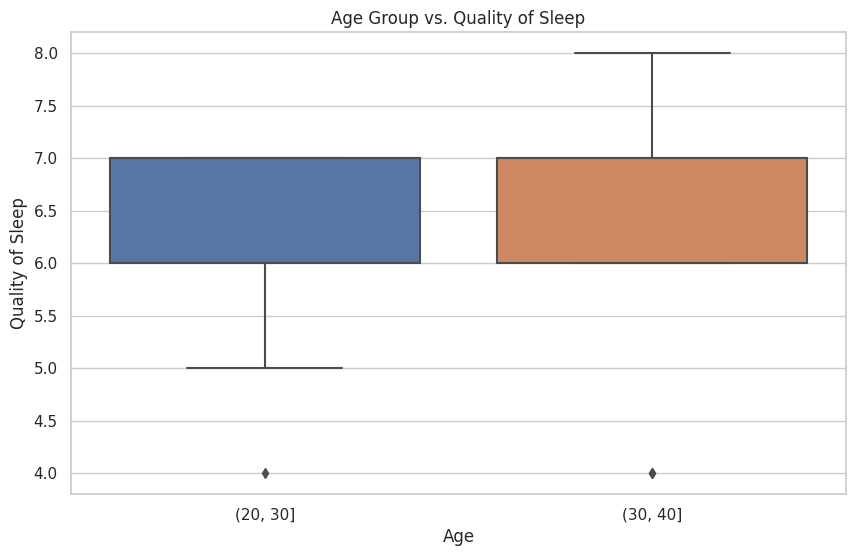

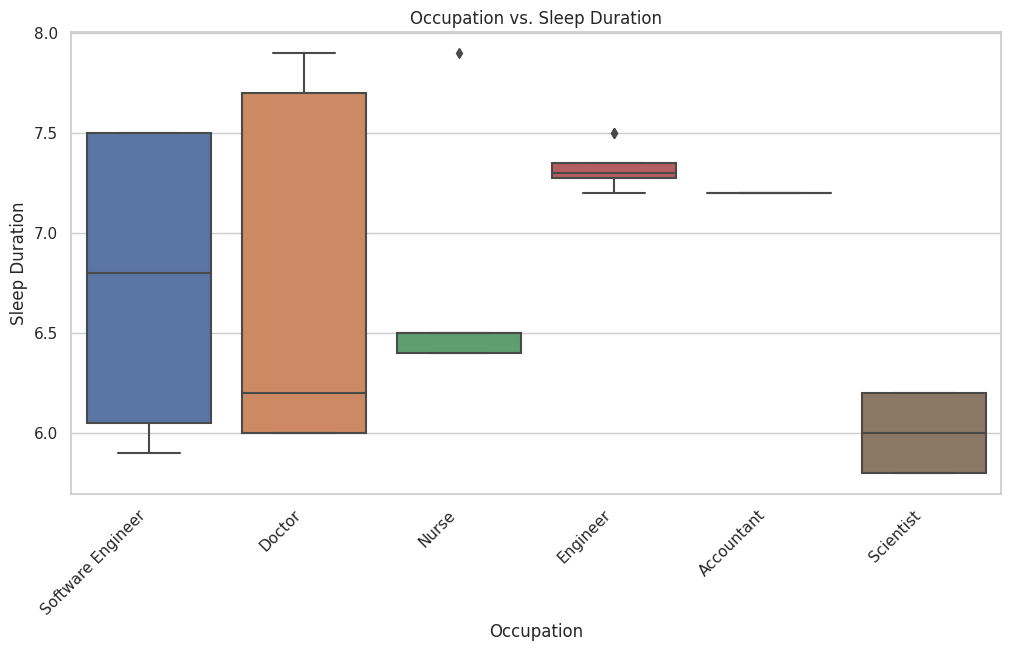

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



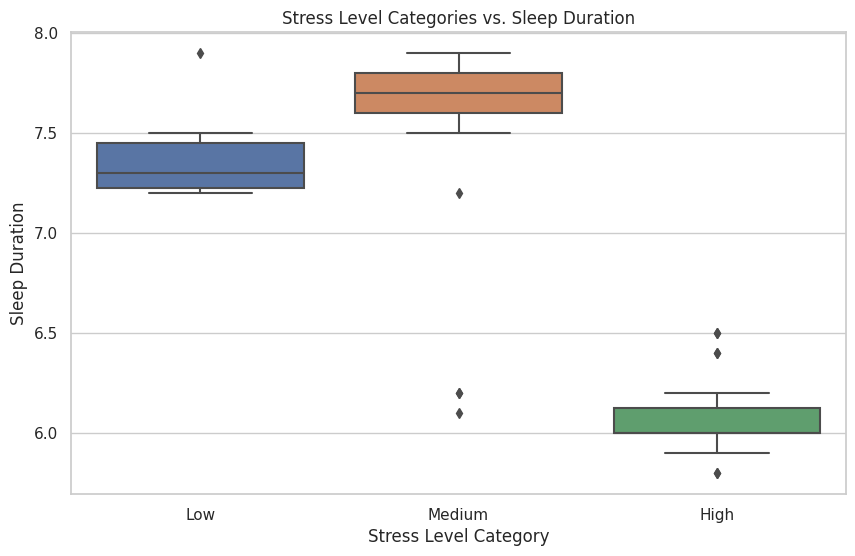

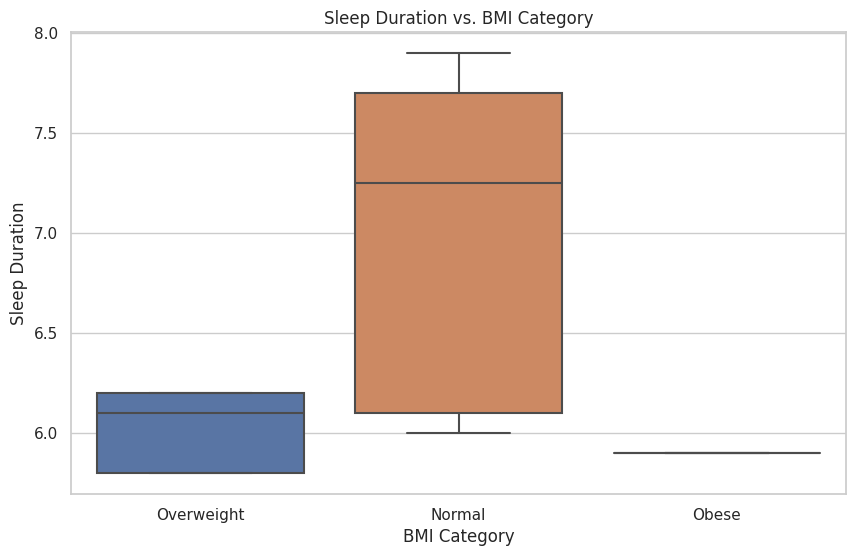

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



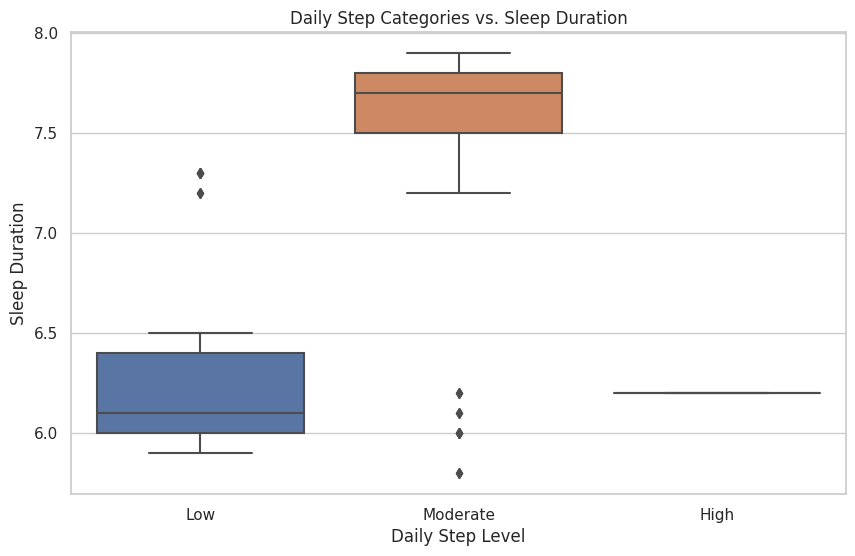

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



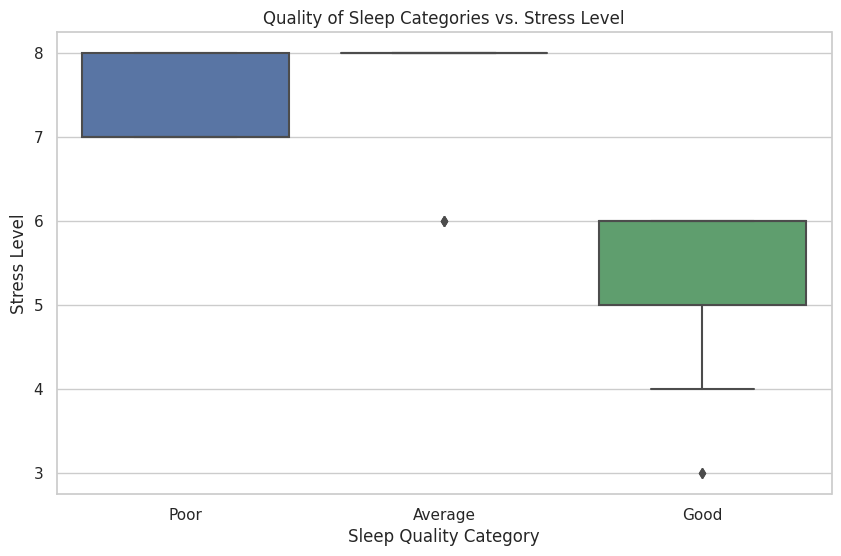

<ipython-input-160-1faa66df6a24>:53: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



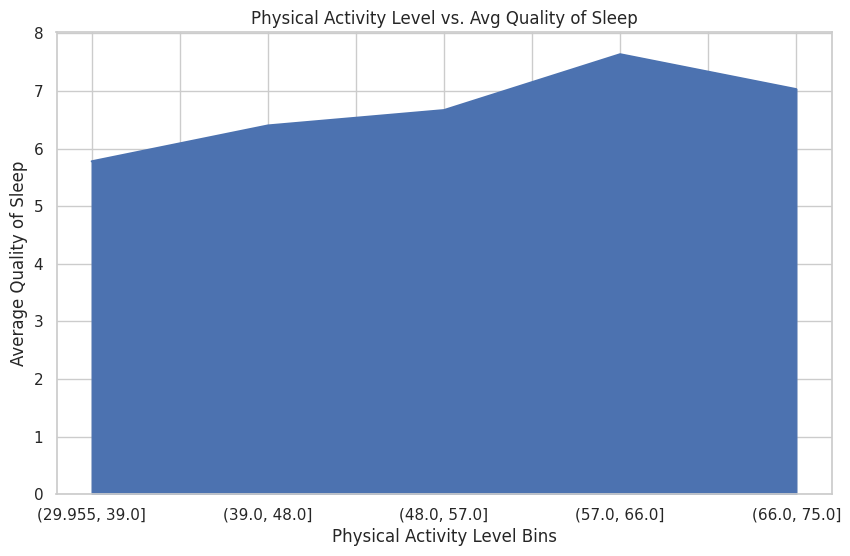

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



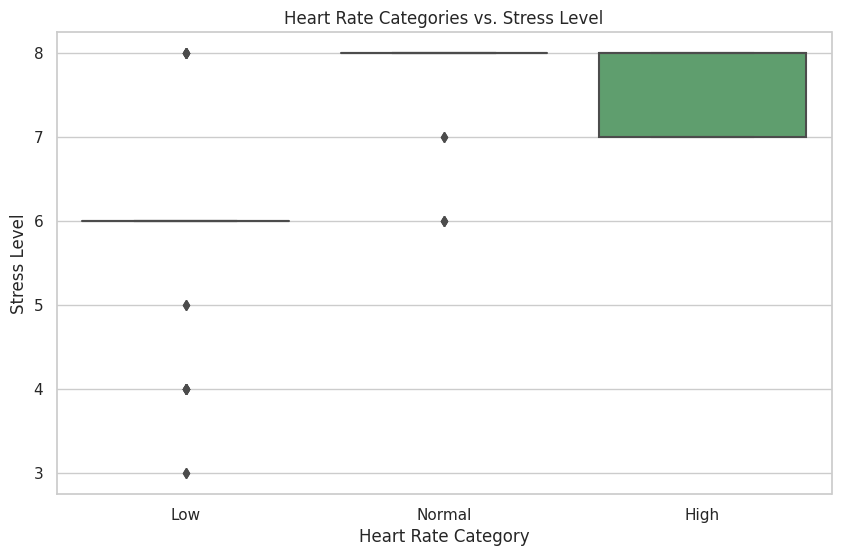

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Age vs. Quality of Sleep (Boxplot - Already correct)
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['Age'], bins=[20, 30, 40]), y='Quality of Sleep', data=df)
plt.title('Age Group vs. Quality of Sleep')
plt.show()

# 3. Occupation vs. Sleep Duration (Boxplot - Already correct)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Occupation vs. Sleep Duration')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Sleep Duration vs. Stress Level (Converted to Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['Stress Level'], bins=3, labels=['Low', 'Medium', 'High']), 
            y='Sleep Duration', 
            data=df)
plt.title('Stress Level Categories vs. Sleep Duration')
plt.xlabel('Stress Level Category')
plt.show()

# 5. Sleep Duration vs. BMI Category (Boxplot - Already correct)
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('Sleep Duration vs. BMI Category')
plt.show()

# 6. Sleep Duration vs. Daily Steps (Converted to Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.qcut(df['Daily Steps'], q=3, labels=['Low', 'Moderate', 'High']), 
            y='Sleep Duration', 
            data=df)
plt.title('Daily Step Categories vs. Sleep Duration')
plt.xlabel('Daily Step Level')
plt.show()

# 7. Quality of Sleep vs. Stress Level (Converted to Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['Quality of Sleep'], bins=3, labels=['Poor', 'Average', 'Good']), 
            y='Stress Level', 
            data=df)
plt.title('Quality of Sleep Categories vs. Stress Level')
plt.xlabel('Sleep Quality Category')
plt.show()

# 8. Quality of Sleep vs. Physical Activity Level (Area Plot)
plt.figure(figsize=(10, 6))
df.groupby(pd.cut(df['Physical Activity Level'], bins=5))['Quality of Sleep'].mean().plot(kind='area')
plt.title('Physical Activity Level vs. Avg Quality of Sleep')
plt.xlabel('Physical Activity Level Bins')
plt.ylabel('Average Quality of Sleep')
plt.show()

# 9. Stress Level vs. Heart Rate (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['Heart Rate'], bins=3, labels=['Low', 'Normal', 'High']), 
            y='Stress Level', 
            data=df)
plt.title('Heart Rate Categories vs. Stress Level')
plt.xlabel('Heart Rate Category')
plt.show()

# # 10. BMI Category vs. Blood Pressure (Boxplot - Already correct)
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='BMI Category', y=df['Blood Pressure'].str.split('/').str[0].astype(int), data=df)
# plt.title('BMI Category vs. Systolic Blood Pressure')
# plt.show()

# # 11. Daily Steps vs. Physical Activity Level (Boxplot)
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=pd.qcut(df['Physical Activity Level'], q=3, labels=['Low', 'Moderate', 'High']), 
#             y='Daily Steps', 
#             data=df)
# plt.title('Physical Activity Level Categories vs. Daily Steps')
# plt.xlabel('Physical Activity Level')
# plt.show()

# # 12. Sleep Disorder vs. Stress Level (Boxplot - Already correct)
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df)
# plt.title('Sleep Disorder vs. Stress Level')
# plt.show()

In [161]:
# Step 3: Drop Unwanted Columns
df = df.drop(['Person ID', 'Gender', 'Blood Pressure', 'Physical Activity Level','Age'], axis=1)

# Step 4: Identify numerical and categorical columns
numerical_features = [ 'Sleep Duration', 'Age_numeric','Quality of Sleep', 'Stress Level','Daily Steps','Heart Rate']
categorical_features = ['Occupation', 'BMI Category', 'Sleep Disorder']

# Step 5: Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # No scaling
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Step 6: Preprocess the data
X = df.drop('Fitness_Score', axis=1)
y = df['Fitness_Score']
X = preprocessor.fit_transform(X)

# Step 7: Find best three main features to predict fitness score
# Calculate correlations
correlations = {}
feature_names = preprocessor.get_feature_names_out()
for i in range(X.shape[1]):
    correlations[feature_names[i]] = np.corrcoef(X[:, i], y)[0, 1]

# Sort features by absolute correlation
sorted_features = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Select top 3 features
top_3_features = [feature[0] for feature in sorted_features[:3]]
print("Top 3 features:", top_3_features)

# Get indices of top features
#top_feature_indices = [int(feature.split('_')[1]) for feature in top_3_features]
#X_selected = X[:, top_feature_indices]
# Instead of selecting based on indices, select based on names:
X_selected_df = pd.DataFrame(X, columns = feature_names)
X_selected = X_selected_df[top_3_features].values


# Step 8: Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 9: Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Evaluate model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2-squared: {r2}")
print(f"Mean Squared Error: {mse}")

Top 3 features: ['num__Sleep Duration', 'num__Daily Steps', 'num__Quality of Sleep']
R2-squared: 0.9722983470878224
Mean Squared Error: 12.245766181689325


In [162]:
# Example usage for regression:
results_df = evaluate_regression_models(df.copy(), "Fitness_Score")
print(tabulate(results_df, headers="keys", tablefmt="fancy_grid", showindex=False))

╒══════════════════╤══════════╤════════════╕
│ Model Name       │      MSE │   R2 Score │
╞══════════════════╪══════════╪════════════╡
│ ExtraTrees       │   0.0008 │     0.9999 │
├──────────────────┼──────────┼────────────┤
│ RandomForest     │   1.1713 │     0.923  │
├──────────────────┼──────────┼────────────┤
│ GradientBoosting │   0.0002 │     1      │
├──────────────────┼──────────┼────────────┤
│ DecisionTree     │   0      │     1      │
├──────────────────┼──────────┼────────────┤
│ LibLinear_SVR    │ 372.154  │   -23.4677 │
╘══════════════════╧══════════╧════════════╛


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [163]:
# Call the function
importance_df = calculate_feature_importance(df, target_column='Fitness_Score')

# Display the result
print(importance_df)

            Feature  Importance
0  Quality of Sleep    0.467113
1    Sleep Duration    0.450130
2       Daily Steps    0.042532
3      Stress Level    0.016966
4       Age_numeric    0.009969
5        Occupation    0.007412
6        Heart Rate    0.003779
7      BMI Category    0.001913
8    Sleep Disorder    0.000186


In [164]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR

def evaluate_regression_models_tuned(df, target_column):
    """Trains and evaluates regression models with hyperparameter tuning."""
    
    # Prepare Data
    df = df.dropna()
    X = pd.get_dummies(df.drop(columns=[target_column]))  # Encode categorical features
    y = df[target_column]
    
    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define Regression Models with Parameter Ranges
    models = {
        "ExtraTrees": ExtraTreesRegressor(
            n_estimators=200,
            max_depth=30,
            min_samples_split=5,
            max_features='sqrt',
            random_state=42
        ),
        "RandomForest": RandomForestRegressor(
            n_estimators=300,
            max_depth=25,
            min_samples_leaf=2,
            bootstrap=True,
            random_state=42
        ),
        "GradientBoosting": GradientBoostingRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=5,
            subsample=0.8,
            random_state=42
        ),
        "DecisionTree": DecisionTreeRegressor(
            max_depth=10,
            min_samples_split=10,
            min_samples_leaf=4,
            random_state=42
        ),
        "LibLinear_SVR": LinearSVR(
            C=1.0,
            epsilon=0.2,
            max_iter=10000,
            random_state=42
        )
    }

    # Train and Evaluate Models
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Regression Metrics
        mse = round(mean_squared_error(y_test, y_pred), 4)
        r2 = round(r2_score(y_test, y_pred), 4)
        
        results.append([name, mse, r2])
    
    # Create DataFrame
    df_results = pd.DataFrame(results, columns=["Model Name", "MSE", "R2 Score"])
    return df_results

In [165]:
tuned_results = evaluate_regression_models_tuned(df.copy(), "Fitness_Score")
print(tabulate(tuned_results, headers="keys", tablefmt="fancy_grid", showindex=False))

╒══════════════════╤═════════╤════════════╕
│ Model Name       │     MSE │   R2 Score │
╞══════════════════╪═════════╪════════════╡
│ ExtraTrees       │  4.9515 │     0.6745 │
├──────────────────┼─────────┼────────────┤
│ RandomForest     │  9.1675 │     0.3973 │
├──────────────────┼─────────┼────────────┤
│ GradientBoosting │  0.016  │     0.9989 │
├──────────────────┼─────────┼────────────┤
│ DecisionTree     │ 60.1    │    -2.9513 │
├──────────────────┼─────────┼────────────┤
│ LibLinear_SVR    │ 84.8776 │    -4.5804 │
╘══════════════════╧═════════╧════════════╛


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [166]:
def create_fitness_summary(df):
    """Creates a summary of age group vs physical fitness and exports to Excel."""
    
    # Create a summary table for age_group vs physical fitness
    summary_table = df.groupby(['age_group', 'physical_fitness']).size().unstack(fill_value=0)
    
    # Export to Excel
    summary_table.to_excel('age_group_vs_physical_fitness.xlsx', sheet_name='Fitness Summary')

In [168]:
# Run the function to evaluate models and get results
results = evaluate_regression_models_tuned(df, 'Fitness_Score')
print(results)

         Model Name      MSE  R2 Score
0        ExtraTrees   4.9515    0.6745
1      RandomForest   9.1675    0.3973
2  GradientBoosting   0.0160    0.9989
3      DecisionTree  60.1000   -2.9513
4     LibLinear_SVR  84.8776   -4.5804


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [170]:
 # create_fitness_summary(df)